# PCA ggplot

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
import pyreadr
import pandas as pd
result = pyreadr.read_r('./data/decathlon2.rda')
X = result["decathlon2"]

In [3]:
from scientisttools.decomposition import PCA
res_pca = PCA(standardize=True,n_components=None,ind_sup=list(range(23,X.shape[0])),quanti_sup=[10,11],quali_sup=12,parallelize=True)
res_pca.fit(X)

PCA(ind_sup=[23, 24, 25, 26], n_components=None, parallelize=True, quali_sup=12,
    quanti_sup=[10, 11])

## Individuals Factor Map

### Colors bu RGB colors

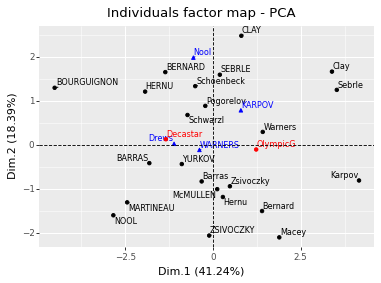

In [4]:
from scientisttools.ggplot import fviz_pca_ind
p = fviz_pca_ind(res_pca,repel=True)
print(p)

### Color by cos2

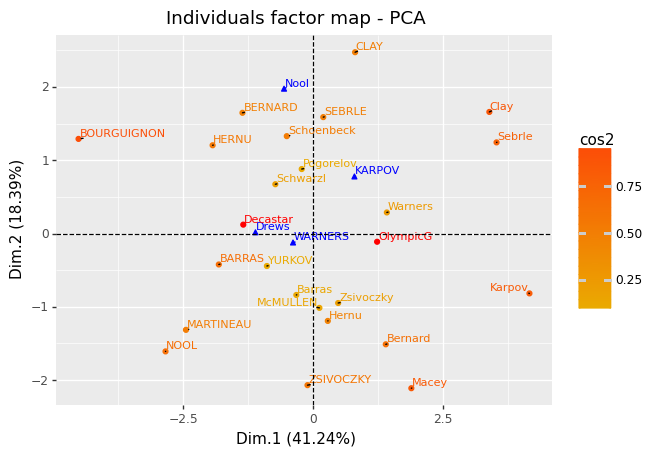

In [5]:
p = fviz_pca_ind(res_pca,color="cos2",repel=True)
print(p)

### Color by contrib

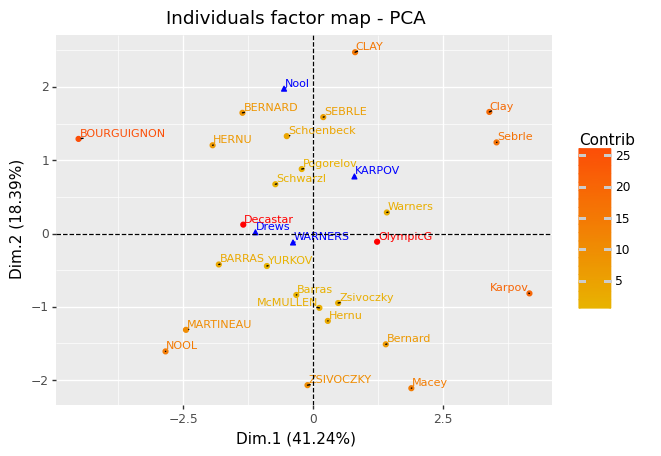

In [6]:
p = fviz_pca_ind(res_pca,color="contrib",repel=True)
print(p)

### Color by quantitative columns

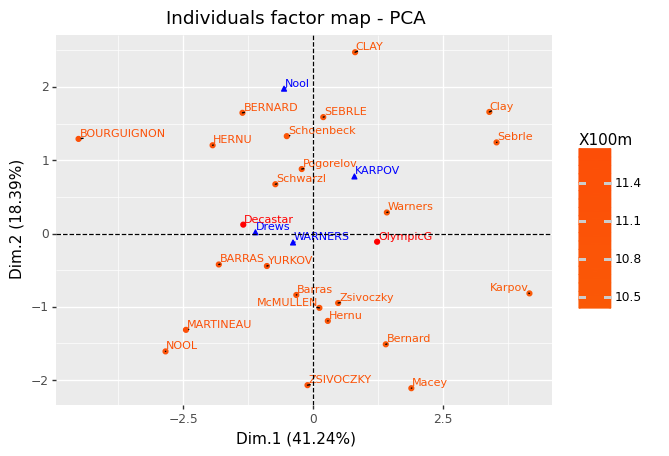

In [7]:
p = fviz_pca_ind(res_pca,color=X.columns.tolist()[0],repel=True)
print(p)

### Color by qualitatives columns

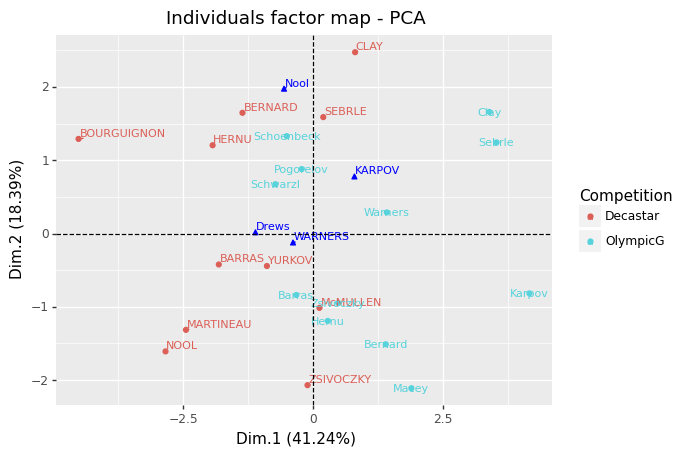

In [8]:
p = fviz_pca_ind(res_pca,habillage=X.columns.tolist()[-1],repel=True)
print(p)

### Color by numpy array

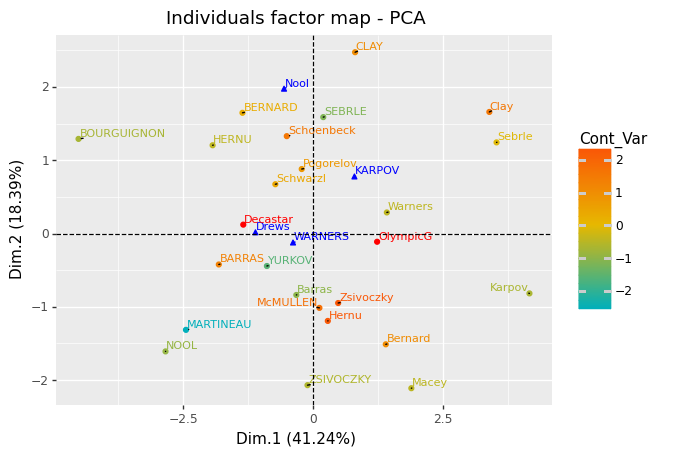

In [9]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_pca.call_["X"].shape[0])
p = fviz_pca_ind(res_pca,color=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

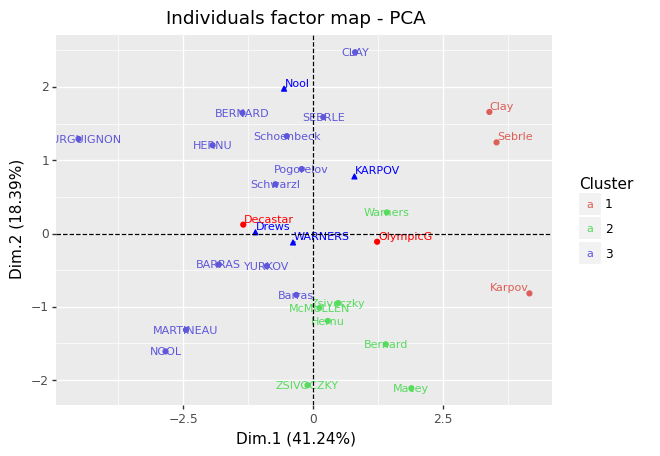

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_pca.ind_["coord"])
p = fviz_pca_ind(res_pca,color=kmeans,repel=True)
print(p)

### Set limits

#### Limit with cos2

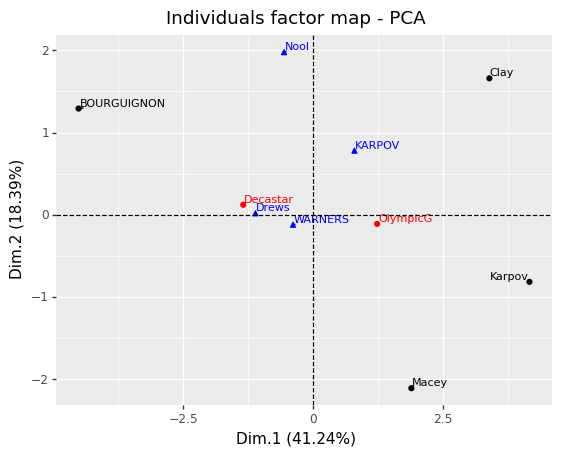

In [11]:
p = fviz_pca_ind(res_pca,lim_cos2=0.8,repel=True)
print(p)

#### Limit with contrib

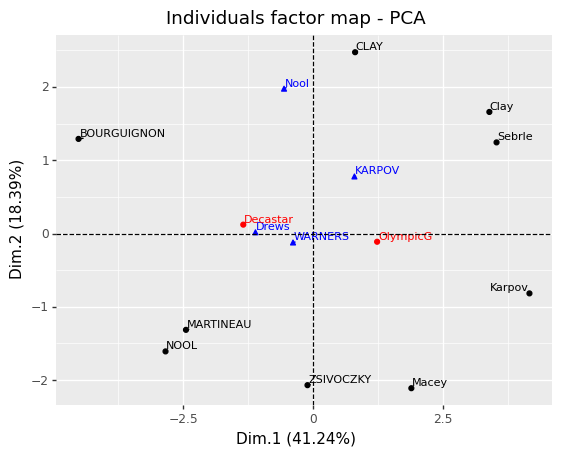

In [12]:
p = fviz_pca_ind(res_pca,lim_contrib=10,repel=True)
print(p)

## Variables Factor Map

### Color by RGB

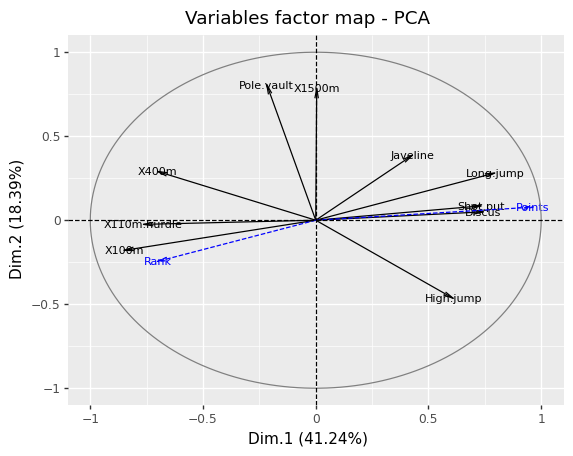

In [13]:
from scientisttools.ggplot import fviz_pca_var
p = fviz_pca_var(res_pca)
print(p)

### Color by cos2

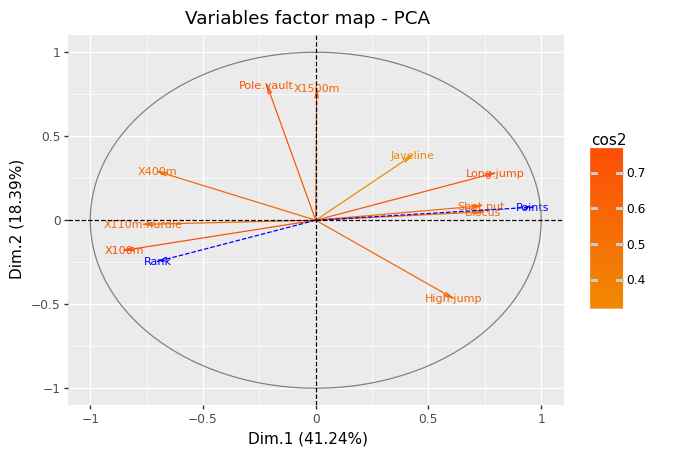

In [14]:
p = fviz_pca_var(res_pca,color="cos2")
print(p)

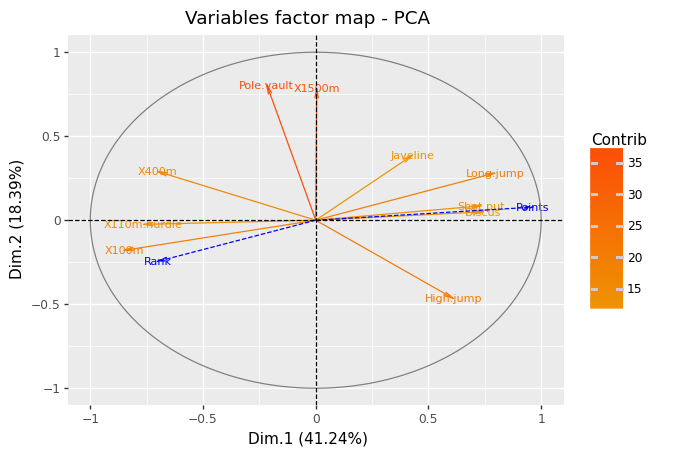

In [15]:
p = fviz_pca_var(res_pca,color="contrib")
print(p)

### Color by numpy array

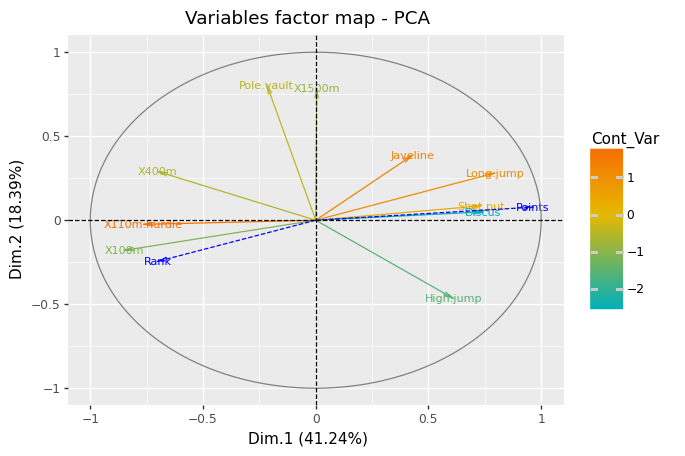

In [16]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_pca.call_["X"].shape[1])
p = fviz_pca_var(res_pca,color=color_numpy)
print(p)

### Color by kmeans clustering

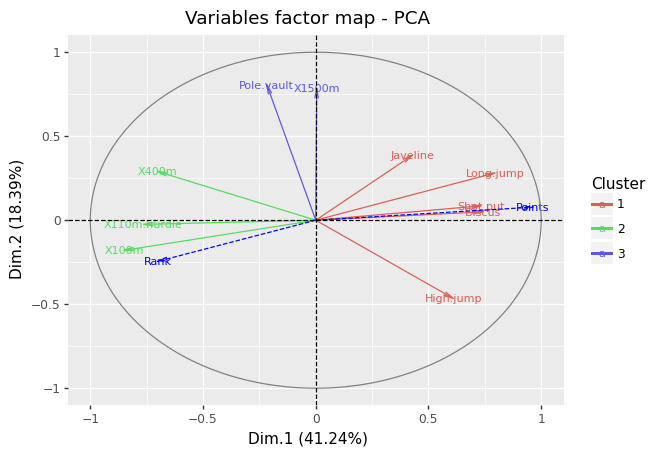

In [17]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_pca.var_["coord"])
p = fviz_pca_var(res_pca,color=kmeans)
print(p)

### Set limits

#### Limit with cos2

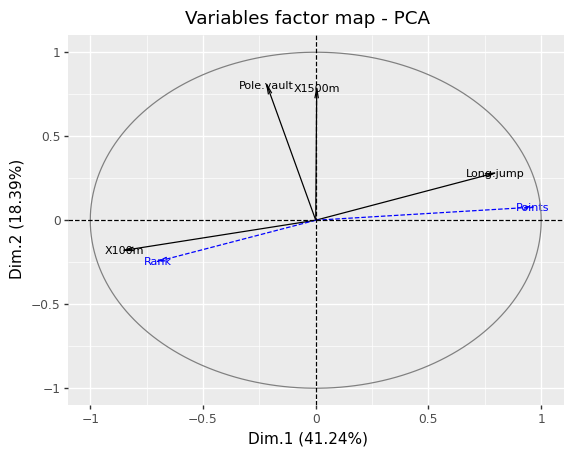

In [18]:
p = fviz_pca_var(res_pca,lim_cos2=0.6)
print(p)

#### Limit with contrib

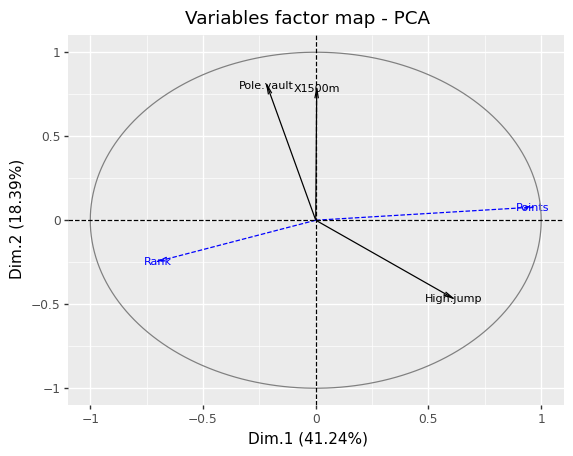

In [19]:
p = fviz_pca_var(res_pca,lim_contrib=20)
print(p)